# Multi-Class Classification for 6 different class

---



---



### Step 1: Extract the data set

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We need to upload the data set.
The data set comprises of 6 different classes, i.e(Buildings,
 Forest, Glacier, Mountain, Sea, Street) and is divided in train test and dev set.We first import files from the google colab to upload the zip file.


In [ ]:
# Now we need to extract files from the zip file
extract_folder = '/content/data_folder'
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile('/content/drive/MyDrive/Image Classification Data/archive.zip', 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List the extracted files
print(os.listdir(extract_folder))

['seg_pred', 'seg_train', 'seg_test']


### Step 2: Import all Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling, Flatten, Dense, Dropout
from tensorflow.keras import mixed_precision
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2


In [ ]:
img_train = '/content/data_folder/seg_train/seg_train'
img_test= '/content/data_folder/seg_test/seg_test'
img_predict= '/content/data_folder/seg_pred/seg_pred'

### Step 3: Converting Image into Data Set

In [ ]:
data_train=tf.keras.utils.image_dataset_from_directory(
    img_train,
    shuffle=True,
    image_size=(150, 150),
    batch_size=32,
    subset='training',
    seed=42,
    validation_split=0.05
)


Found 14034 files belonging to 6 classes.
Using 13333 files for training.


In [ ]:
data_cat=data_train.class_names # this line gives a list of all the classes and is assign to data_cat
print(data_cat)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [ ]:
data_test=tf.keras.utils.image_dataset_from_directory(
    img_test,
    shuffle=True,
    image_size=(150, 150),
    batch_size=32,
    validation_split=False

)

Found 3000 files belonging to 6 classes.


In [ ]:
data_dev=tf.keras.utils.image_dataset_from_directory(
    img_train,
    shuffle=True,
    image_size=(150, 150),
    batch_size=32,
    validation_split=0.1,
    subset='validation',
    seed=42
)

Found 14034 files belonging to 6 classes.
Using 1403 files for validation.


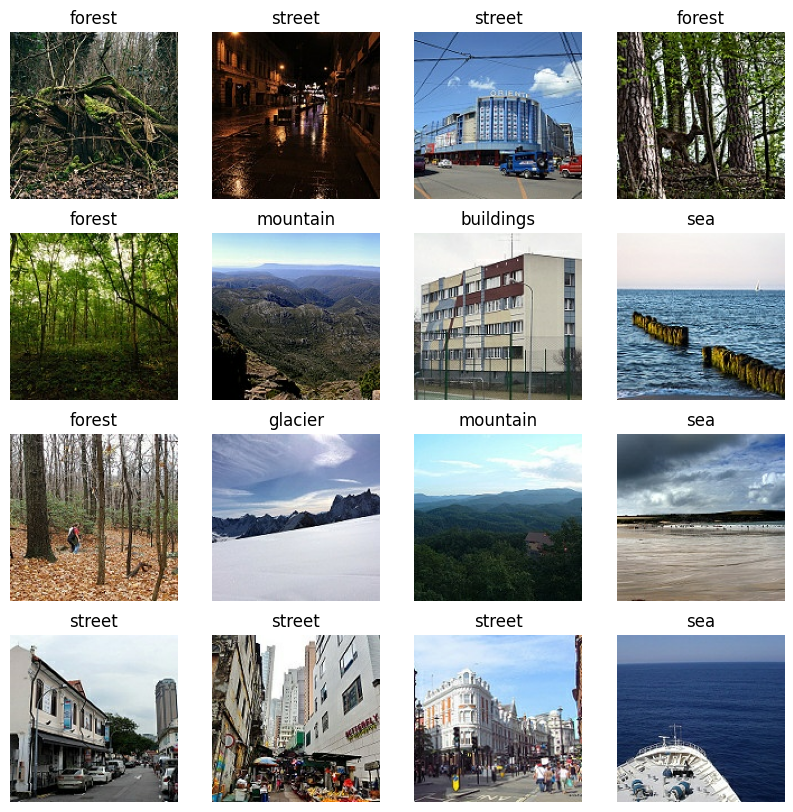

In [ ]:
# Plotting the images of the training data
plt.figure(figsize=(10, 10))

for images, labels in data_train.take(1):
    num_images = images.shape[0]

    for i in range(min(16, num_images)):  # Ensure we don't go out of bounds
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i].numpy()])
        plt.axis("off")


In [ ]:
for batch in data_train.take(1):  # Take 1 batch
    print(batch[0].numpy().max())  # Accessing data and converting to numpy
    print(batch[0].numpy().min())

255.0
0.0


### Step 4: Building Convulational Neural Network

In [ ]:

model = Sequential([
    Rescaling(1./255, input_shape=(150, 150, 3)), #we divide by 255 as to bring the numbers in range 0 to 1
    Conv2D(32, (3, 3), activation='relu',padding='same', kernel_regularizer=l2(0.007), strides=2),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu',padding='same',kernel_regularizer=l2(0.007), strides=1),
    MaxPooling2D((2, 2)),

    Conv2D(128, (2, 2), activation='relu',padding='same',kernel_regularizer=l2(0.007),strides=1),
    MaxPooling2D((2, 2)),


    Flatten(),
    Dropout(0.2),
    Dense(1024, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
    ])

In [ ]:
mixed_precision.set_global_policy('mixed_float16')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 37, 37, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 18, 18, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 18, 18, 128)      

In [ ]:
epochy=30

history = model.fit(data_train, epochs=epochy, validation_data=data_dev)

Epoch 1/30
417/417 [==============================] - 11s 17ms/step - loss: 1.3469 - accuracy: 0.5294 - val_loss: 1.0413 - val_accuracy: 0.6230
Epoch 2/30
417/417 [==============================] - 9s 21ms/step - loss: 0.9884 - accuracy: 0.6560 - val_loss: 0.8396 - val_accuracy: 0.7085
Epoch 3/30
417/417 [==============================] - 7s 16ms/step - loss: 0.8585 - accuracy: 0.7101 - val_loss: 0.8008 - val_accuracy: 0.7206
Epoch 4/30
417/417 [==============================] - 9s 21ms/step - loss: 0.7846 - accuracy: 0.7395 - val_loss: 0.6903 - val_accuracy: 0.7833
Epoch 5/30
417/417 [==============================] - 8s 18ms/step - loss: 0.7176 - accuracy: 0.7692 - val_loss: 0.6408 - val_accuracy: 0.7862
Epoch 6/30
417/417 [==============================] - 8s 19ms/step - loss: 0.6485 - accuracy: 0.7964 - val_loss: 0.6916 - val_accuracy: 0.7762
Epoch 7/30
417/417 [==============================] - 9s 21ms/step - loss: 0.6055 - accuracy: 0.8143 - val_loss: 0.5441 - val_accuracy: 0.841

### Step 5: Drwing the plot of Accuracy and Loss

Text(0.5, 1.0, 'Training and Validation loss')

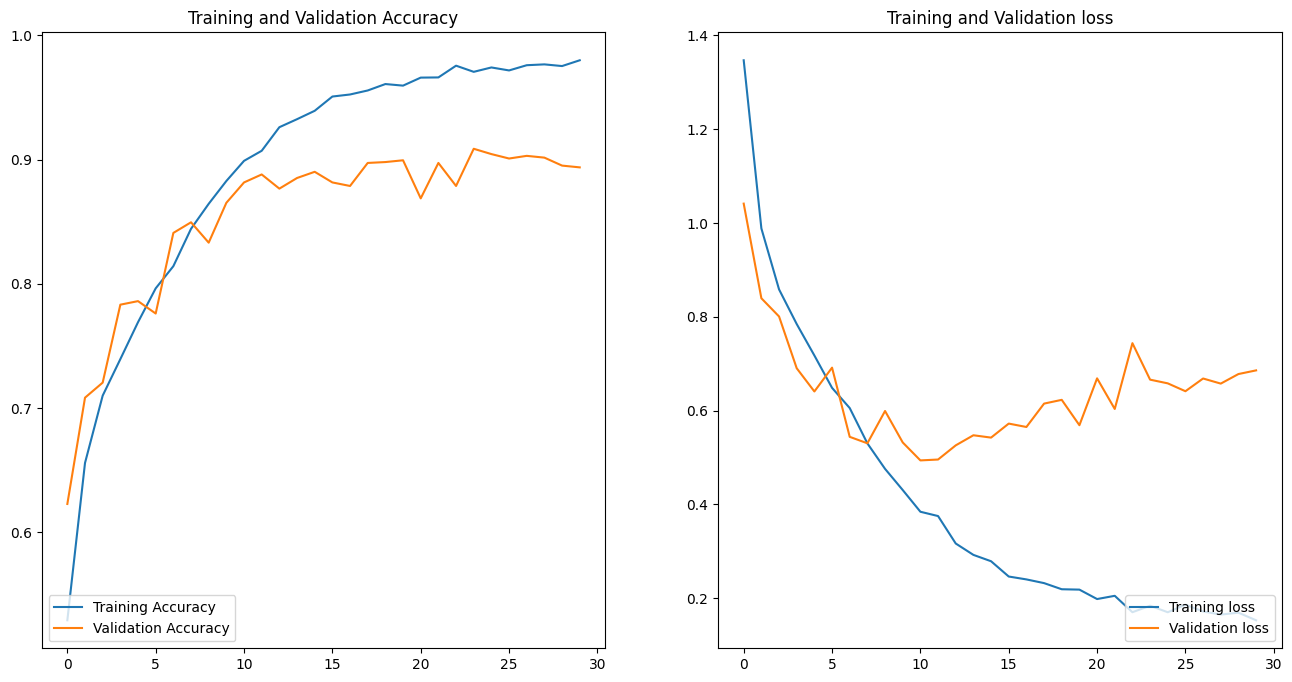

In [ ]:
epochs_range=range(epochy)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.legend(loc='lower left')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

### Step 6: Testing the Model Pridiction

Found 3000 files belonging to 6 classes.
94/94 [==============================] - 2s 19ms/step - loss: 1.2829 - accuracy: 0.7730
Test Loss: 1.2829080820083618
Test Accuracy: 0.7730000019073486
1/1 [==============================] - 0s 436ms/step
Pred Class: [3 4 3 0 3 1 3 2 2 1 1 5 4 2 2 2 1 0 3 0 0 0 5 5 2 2 5 4 5 0 3 4]
True Lbl: [3 4 3 0 3 1 3 2 2 1 1 5 4 2 3 2 1 0 3 0 5 0 1 2 2 2 2 2 5 0 4 3]


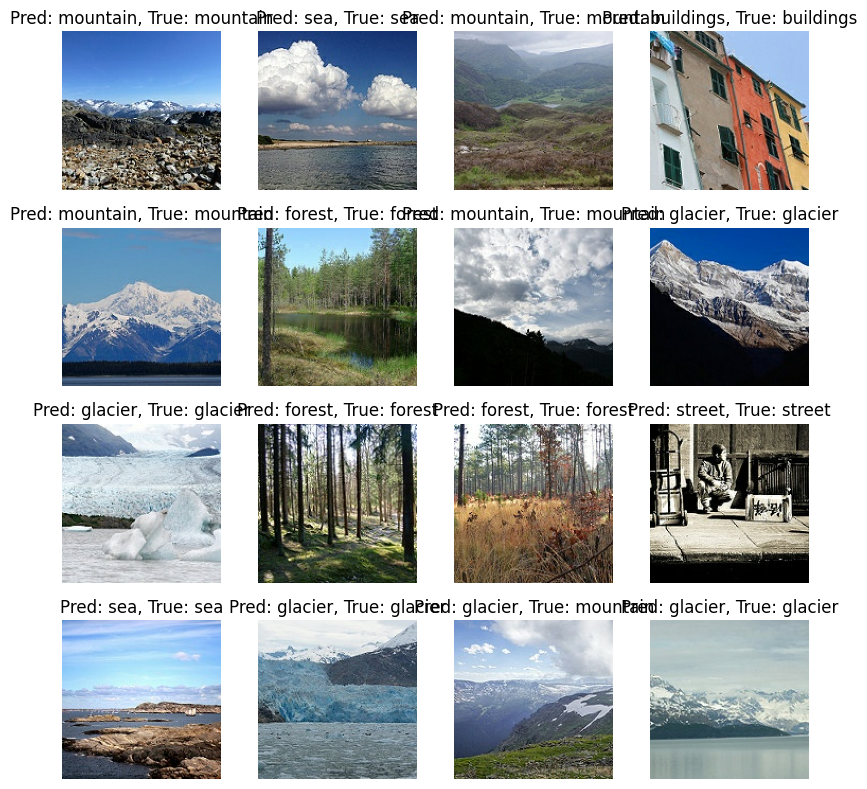

In [ ]:
img_test = '/content/data_folder/seg_test/seg_test'

data_test = tf.keras.utils.image_dataset_from_directory(
    img_test,
    shuffle=True,
    image_size=(150, 150),
    batch_size=32
)


test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on a batch of test data
for images, labels in data_test.take(1):
    predictions = model.predict(images)
    predicted_classes = tf.argmax(predictions, axis=1)
    print("Pred Class:", predicted_classes.numpy())
    print("True Lbl:", labels.numpy())

    # Display the images with their predicted and true labels
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 8))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {data_test.class_names[predicted_classes[i]]}, True: {data_test.class_names[labels[i]]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()